In [ ]:
!pip install fastbook

In [11]:
from fastai.vision.all import *
from fastbook import *
import torch

In [12]:
path = untar_data(URLs.MNIST_SAMPLE); path

Path('/root/.fastai/data/mnist_sample')

In [13]:
paths_train_3 = (path/'train/3').ls(); paths_train_3

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/14467.png'),Path('/root/.fastai/data/mnist_sample/train/3/28263.png'),Path('/root/.fastai/data/mnist_sample/train/3/26596.png'),Path('/root/.fastai/data/mnist_sample/train/3/28037.png'),Path('/root/.fastai/data/mnist_sample/train/3/54615.png'),Path('/root/.fastai/data/mnist_sample/train/3/51837.png'),Path('/root/.fastai/data/mnist_sample/train/3/40462.png'),Path('/root/.fastai/data/mnist_sample/train/3/2203.png'),Path('/root/.fastai/data/mnist_sample/train/3/11929.png'),Path('/root/.fastai/data/mnist_sample/train/3/14352.png')...]

In [14]:
paths_train_7 = (path/'train/7').ls(); paths_train_7

(#6265) [Path('/root/.fastai/data/mnist_sample/train/7/24599.png'),Path('/root/.fastai/data/mnist_sample/train/7/45835.png'),Path('/root/.fastai/data/mnist_sample/train/7/18289.png'),Path('/root/.fastai/data/mnist_sample/train/7/58205.png'),Path('/root/.fastai/data/mnist_sample/train/7/31257.png'),Path('/root/.fastai/data/mnist_sample/train/7/19284.png'),Path('/root/.fastai/data/mnist_sample/train/7/52423.png'),Path('/root/.fastai/data/mnist_sample/train/7/57540.png'),Path('/root/.fastai/data/mnist_sample/train/7/30153.png'),Path('/root/.fastai/data/mnist_sample/train/7/55180.png')...]

In [15]:
len(paths_train_3), len(paths_train_7)

(6131, 6265)

In [16]:
train_3_tnrs = [tensor(Image.open(p)) for p in paths_train_3]; len(train_3_tnrs)

6131

In [17]:
train_7_tnrs = [tensor(Image.open(p)) for p in paths_train_7]; len(train_7_tnrs)

6265

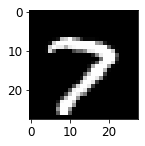

In [18]:
plt.figure(figsize=(2,2))
plt.imshow(train_7_tnrs[0], cmap='gray')

In [19]:
train_7_stack = torch.stack(train_7_tnrs); train_7_stack.shape

torch.Size([6265, 28, 28])

In [20]:
train_3_stack = torch.stack(train_3_tnrs); train_3_stack.shape

torch.Size([6131, 28, 28])

In [21]:
train_3_flat = train_3_stack.flatten(1); train_3_flat.shape

torch.Size([6131, 784])

In [22]:
train_7_flat = train_7_stack.flatten(1); train_7_flat.shape

torch.Size([6265, 784])

In [23]:
x_train = torch.cat([train_3_flat, train_7_flat]); x_train.shape

torch.Size([12396, 784])

In [24]:
x_train = x_train.float(); x_train.shape

torch.Size([12396, 784])

In [25]:
y_train = tensor([1]*len(train_3_tnrs) + [0]*len(train_7_tnrs)).float().unsqueeze(1); y_train.shape

torch.Size([12396, 1])

In [26]:
x_train[0] @ torch.randn(x_train.shape[1], 1)

tensor([-2713.8276])

In [27]:
def init_params(shape): return torch.randn(shape).requires_grad_()

In [28]:
def linear1(xb): return xb@weights + bias

In [29]:
def mnist_loss(preds, trgts):
    preds = preds.sigmoid()
    return torch.where(trgts==1.0, 1 - preds, preds).mean()

In [30]:
ds = list((zip(x_train, y_train))); len(ds)

12396

In [36]:
len(ds[0]), len(ds[1])

(2, 2)

In [43]:
x_train_0, y_train_0 = ds[0]; x_train_0.shape, y_train_0.shape

(torch.Size([784]), torch.Size([1]))